In [ ]:
# prompt: 구글드라이브 마운트하는 코드

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats

# 레티나 디스플레이 설정
set_matplotlib_formats('retina')

df = pd.read_csv('/content/drive/MyDrive/고객세분화분석/PROCESSED/merged_customer_info.csv')
# 병합 데이터 불러오기

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
clust_list = ['평균순수익','평균수량','Clicked','Used','총거래량']
#클러스터링 대상 열 분리

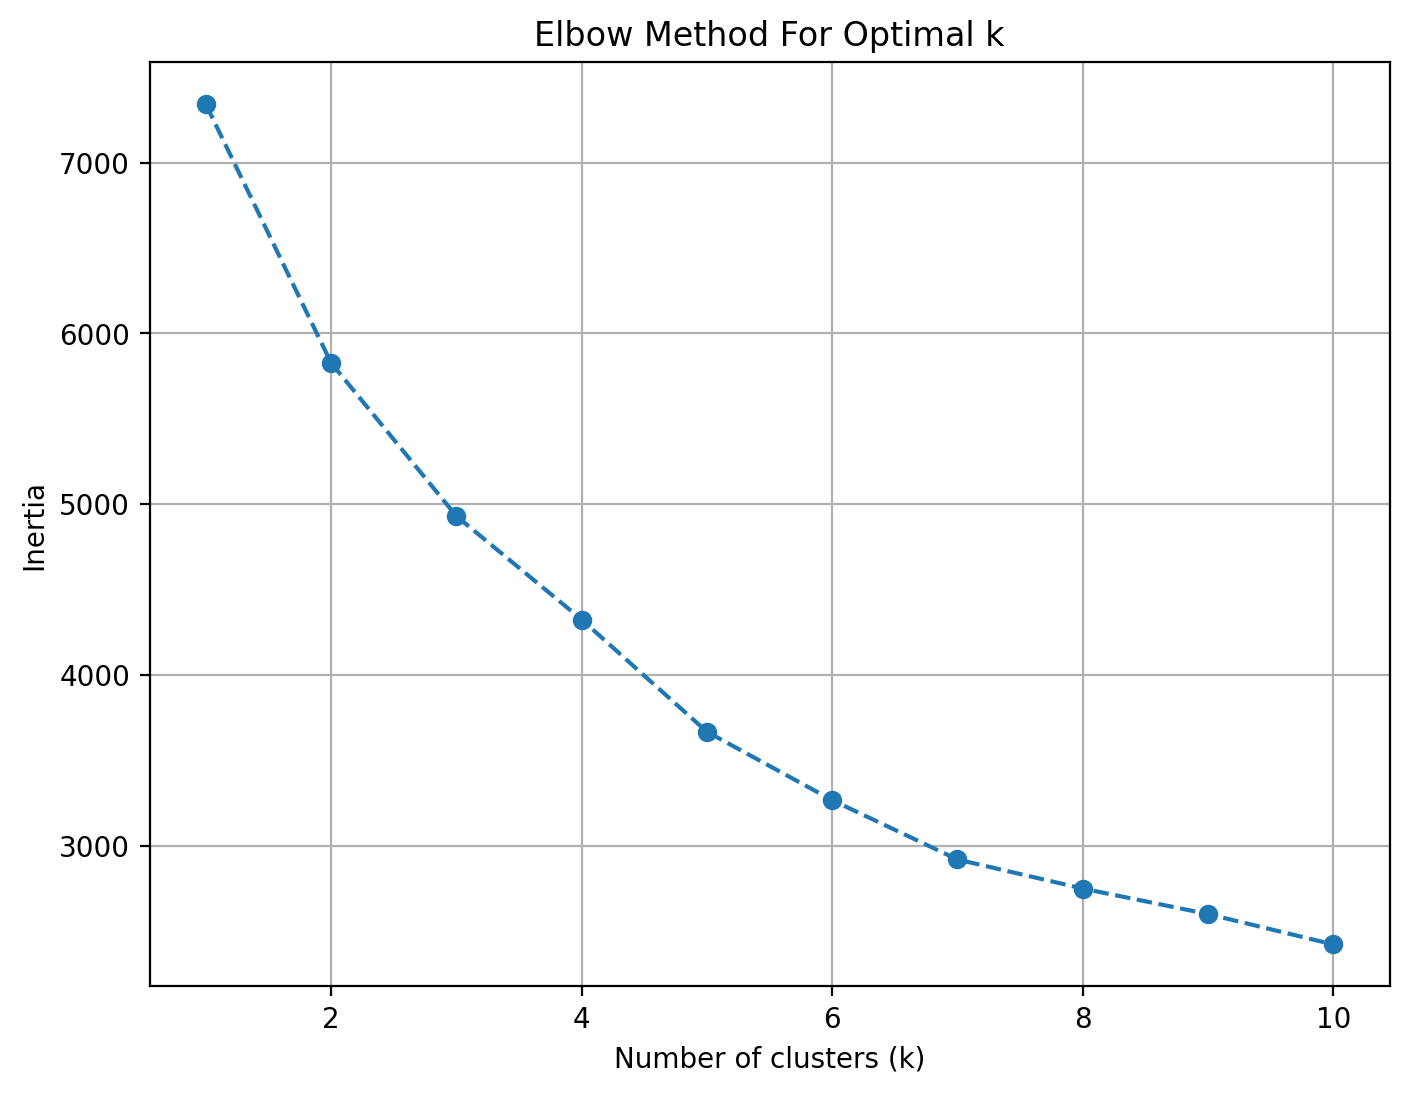

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaler_df = std_scaler.fit_transform(df[clust_list])

def plot_elbow(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
plot_elbow(scaler_df,10)
# 최적의 k값은 4~5라고 볼 수 있음. 다소 애매함

# 엘보 플롯 시각화 및 스케일링

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto') #최적 클러스터 수  5
kmeans.fit(scaler_df)
predict_clst = kmeans.predict(scaler_df)
df['클러스터'] = predict_clst
# 클러스터 수행

In [ ]:
clust_result = df.groupby('클러스터')[clust_list].mean()
# 클러스터 결과 확인
clust_result['총수익'] = clust_result['평균순수익'] * clust_result['총거래량']
# 총수익 결과 생성
np.round(clust_result,2)

,평균순수익,평균수량,Clicked,Used,총거래량,총수익
클러스터,,,,,,
0,59.11,3.06,0.47,0.34,40.02,2365.74
1,60.97,5.09,0.21,0.68,20.90,1274.03
2,171.00,46.45,0.46,0.40,15.18,2596.08
3,67.61,4.61,0.77,0.13,23.47,1586.66
4,64.45,4.39,0.52,0.35,356.88,23001.69


In [ ]:
one_buy_clust = df.groupby(['클러스터'])['일회성구매고객'].value_counts().unstack()
sum_one_buy_clust = one_buy_clust.sum(axis=1)
div_one_buy_clust = one_buy_clust.div(sum_one_buy_clust,axis=0)
# 클러스터별 일회성구매고객 비율 측정
np.round(div_one_buy_clust,2)*100

일회성구매고객,0,1
클러스터,,
0,49.0,51.0
1,34.0,66.0
2,18.0,82.0
3,34.0,66.0
4,100.0,NaN


In [ ]:
one_county_clust = df.groupby(['클러스터'])['거주지역'].value_counts().unstack()
sum_one_county_clust = one_county_clust.sum(axis=1)
div_one_county_clust = one_county_clust.div(sum_one_county_clust,axis=0)
# 클러스터별 거주지역 비율 측정
np.round(div_one_county_clust,2)*100

거주지역,California,Chicago,New Jersey,New York,Washington DC
클러스터,,,,,
0,31.0,32.0,9.0,23.0,5.0
1,32.0,30.0,10.0,23.0,6.0
2,18.0,18.0,36.0,14.0,14.0
3,34.0,30.0,11.0,22.0,4.0
4,29.0,59.0,6.0,6.0,NaN


In [ ]:
item_list = df.columns[3:-10].tolist()
clust_item_ratio = np.round(df.groupby(['클러스터'])[item_list].mean()*100,1)
# 클러스터별 구매 아이템 비율의 차이 확인
clust_item_ratio

,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
클러스터,,,,,,,,,,,,,,,,
0,0.4,0.1,24.3,4.5,0.9,9.7,0.2,1.1,0.5,8.1,2.9,0.5,21.1,2.3,22.8,0.8
1,0.5,0.0,21.8,5.0,0.7,9.7,0.1,1.2,0.4,7.5,2.4,0.5,16.8,2.2,30.3,0.8
2,0.0,0.0,6.9,6.0,0.0,10.6,0.0,0.7,0.0,20.0,0.0,0.0,0.7,5.7,48.8,0.3
3,0.2,0.0,22.4,4.2,0.5,10.0,0.2,1.5,1.0,7.9,2.9,0.3,18.7,2.8,26.7,0.8
4,1.0,0.0,14.8,5.9,0.8,16.5,0.1,1.6,0.9,12.0,1.3,0.2,9.9,3.1,31.5,0.4


# 클러스터링 결과 해석
(새로 돌릴 때 마다 클러스터 번호가 다르게 나올 수 있음.)
- **일반 고객**
  -  클러스터 : 0
  - 모든 변수에 대한 기준이 되는 클러스터. 전체적으로 균형잡힘.
- **체리 피커 고객**
  - 클러스터 : 1
  - 쿠폰 사용률이 높은 편(60%), 거래량이 적고 구매 수량이 많은 편에 속함.
- **헤비 고객**
  - 클러스터 : 2
  - 일회성 고객 비중이 높은 편(82%), 거래량이 적으나 구매 수량이 압도적으로 높음. 뉴저지, 워싱턴 DC에 특히 분포하는 것으로 보이며 일부 제품군(Lifestyle, Office)에 대해 집중적으로 구매하는 경향이 있음. Apparel, Nest-USA 제품군에 대해서는 특히 낮은 관심을 보임.
- **쿠폰 고민 고객**
  - 클러스터 : 3
  - 일반 고객의 특성을 대부분 공유하지만 쿠폰을 클릭한 비율이 높음(77%). 사용하지는 않았으나 관심이 높은 편으로 보임.
- **VIP 고객**
  - 클러스터 : 4
  - 압도적으로 높은 총 수익과 거래량으로 일회성 구매 고객이 없는 특성을 보임. 특히 시카고에 거주하는 비율이 높음. Apparel 제품군에 다소 낮은 관심을 보이며 Drinkware에는 다소 높은 관심을 보임.

